https://www.infer-pub.com/questions/1049-which-country-will-have-published-the-second-most-top-tiered-journal-articles-on-artificial-intelligence-in-2022-according-to-the-oecd-s-ai-policy-observatory

I'm going to redo this based on what I've learned from the stock based questions

In [1]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

from lib import datadir

Country
China             AxesSubplot(0.125,0.125;0.775x0.755)
EU (27)           AxesSubplot(0.125,0.125;0.775x0.755)
United Kingdom    AxesSubplot(0.125,0.125;0.775x0.755)
United States     AxesSubplot(0.125,0.125;0.775x0.755)
Name: Value, dtype: object

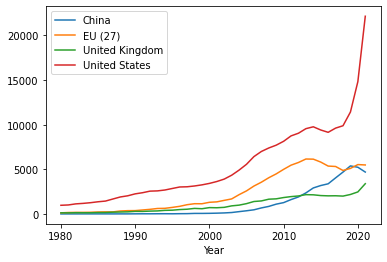

In [2]:
publications = pd.read_csv(datadir / 'AI publication time series by country.csv')

breakout_countries = ['United States', 'China', 'United Kingdom', 'EU (27)']

publications[publications['Country'].isin(breakout_countries)] \
    .set_index('Year') \
    .groupby('Country')['Value'] \
    .plot(legend=True)

looks linear within the last 5 years, but none of the trends are stationary (the statistical properties change over time)

In [3]:
by_country = pd.pivot_table(publications, index='Year', columns='Country', values='Value')
by_country.index = pd.PeriodIndex(by_country.index, freq='Y')
by_country

Country,Australia,Canada,China,EU (27),India,Japan,Korea,Switzerland,United Kingdom,United States
Year,,,,,,,,,,
1980,27.166667,78.950000,1.142857,122.259524,6.833333,41.083333,3.000000,8.973810,124.297619,968.342857
1981,24.583333,76.916667,NaN,159.020513,5.564103,54.353846,3.000000,18.285714,117.666667,1005.795055
1982,37.466667,74.850000,NaN,171.966667,8.833333,37.208333,2.875000,13.416667,137.666667,1126.416667
1983,29.366667,72.577381,2.700000,172.414286,6.333333,44.666667,4.000000,13.960714,134.190476,1182.773810
1984,40.033333,89.600000,3.333333,185.253968,8.700000,60.833333,8.333333,13.883333,131.170635,1259.638095
1985,41.166667,118.476191,3.000000,216.116667,8.416667,49.650000,1.000000,10.934524,154.000000,1362.513095
1986,50.755556,121.219048,2.833333,230.049242,12.333333,55.125000,3.500000,15.700000,157.564141,1439.960823
1987,41.500000,145.566667,1.833333,227.258547,16.833333,59.750000,7.500000,16.294231,196.208333,1672.077778
1988,49.616667,160.954545,4.416667,329.643173,6.250000,64.864044,5.250000,17.958333,214.950287,1900.820093


let's try a simulation based approach

In [4]:
def get_mean_se(ser):
    model = sm.tsa.ARIMA(ser, order=(1, 1, 0))
    results = model.fit()
    forecast_results = results.get_forecast()
    summary = forecast_results.summary_frame()
    return summary.loc['2022']

distributions = by_country.apply(get_mean_se)
distributions

/home/jonah/.virtualenvs/infer-pub/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/jonah/.virtualenvs/infer-pub/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/jonah/.virtualenvs/infer-pub/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Country,Australia,Canada,China,EU (27),India,Japan,Korea,Switzerland,United Kingdom,United States
mean,924.246793,2064.409864,4280.435962,5457.860700,253.907928,681.960855,170.180654,408.197036,4238.408598,29484.952103
mean_se,32.953700,65.301501,173.060910,184.744200,51.520211,30.533576,32.417867,18.527805,133.168811,740.372208
mean_ci_lower,859.658728,1936.421274,3941.242812,5095.768721,152.930171,622.116145,106.642802,371.883206,3977.402524,28033.849241
mean_ci_upper,988.834858,2192.398455,4619.629112,5819.952679,354.885685,741.805565,233.718505,444.510866,4499.414672,30936.054965


(0.0, 8000.0)

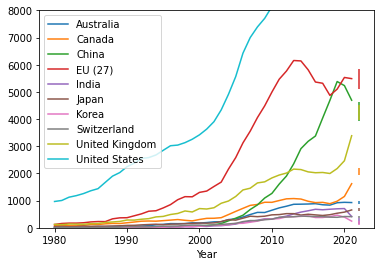

In [5]:
fig, ax = plt.subplots()
publications \
    .set_index('Year') \
    .groupby('Country')['Value'] \
    .plot(ax=ax, legend=True)

colors = pd.DataFrame([(l.get_label(), l.get_color()) for l in ax.get_lines()], columns=['Country', 'color']).set_index('Country')['color']

for country, summary in distributions.items():
    ax.errorbar(2022, summary['mean'], yerr=summary['mean_se']*2, ecolor=colors[country])
ax.set_ylim(0, 8_000)

Let's pretend that our standard error is an underestimate by a factor of 3 because I'm a coward.

In [6]:
samples = distributions.apply(lambda s: np.random.normal(s['mean'], 3*s['mean_se'], 10000))
samples

Country,Australia,Canada,China,EU (27),India,Japan,Korea,Switzerland,United Kingdom,United States
0,831.885189,2004.833082,5299.536319,6283.086734,357.042752,565.950331,209.707486,402.067400,4069.365495,24845.154753
1,799.201526,2013.329309,4649.600004,6115.382679,102.464571,655.119012,259.531387,407.200200,3896.704887,30851.076784
2,1054.753986,1730.249692,4305.890144,5749.193269,243.389290,673.296102,111.265394,519.200808,4153.053057,31365.115159
3,979.060636,2168.109423,4281.668305,6194.969098,-216.378950,653.651281,303.657047,415.541698,3777.630792,31621.783176
4,1026.303175,1873.859475,4401.785571,5813.523811,323.550931,544.992901,147.015264,431.255988,4458.811512,25987.525144
...,...,...,...,...,...,...,...,...,...,...
9995,835.376217,2141.586506,4187.149673,5501.694228,464.460156,687.014936,214.423551,398.497742,4525.112838,26477.024582
9996,905.975078,2109.748019,3814.647047,5807.864045,-80.628376,650.217652,158.252633,393.458601,4543.846965,27856.490610
9997,1092.284314,2062.900368,4493.538945,5806.310585,453.545762,696.379866,28.229444,340.726156,3824.502273,26875.769092
9998,1085.583106,2024.368946,3768.199389,5934.971617,130.628381,596.606583,392.733123,504.871340,4996.591464,27085.950508


In [7]:
second_place = samples.apply(lambda s: s.sort_values(ascending=False).index[1], axis=1)
second_place

0       EU (27)
1       EU (27)
2       EU (27)
3       EU (27)
4       EU (27)
         ...   
9995    EU (27)
9996    EU (27)
9997    EU (27)
9998    EU (27)
9999    EU (27)
Length: 10000, dtype: object

<AxesSubplot:>

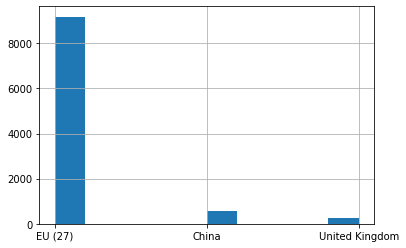

In [8]:
second_place.hist()

In [9]:
counts = second_place.value_counts()
counts /= counts.sum()
counts

EU (27)           0.9175
China             0.0555
United Kingdom    0.0270
dtype: float64